In [4]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

conn = sqlite3.connect('password_data.sqlite')

df = pd.read_sql('SELECT * FROM Users', conn)

In [5]:
df['password_length'] = df['password'].apply(len)

weak = df.query('strength == 0')[['password', 'password_length']]
medium = df.query('strength == 1')[['password', 'password_length']]
strong = df.query('strength == 2')[['password', 'password_length']]

In [6]:
weak.head(10)

,password,password_length
20,dtc5aoy,7
47,paxton0,7
49,joskes9,7
81,saber50,7
91,ficko69,7
111,xddrt62,7
114,kero79,6
123,avgan88,7
140,r4vn0s,6
144,p7vxvr,6


In [7]:
medium.head(10)

,password,password_length
0,zxe870819,9
1,xw46454nr23l,12
2,soporte13,9
4,c443balg,8
5,16623670p,9
6,yj9q3f8p,8
8,djredd09,8
9,yin172015,9
10,bodrum1903,10
11,sapito22,8


In [8]:
strong.head(10)

,password,password_length
3,accounts6000webhost.com,23
7,180ZIRUVIcuFERy,15
14,crnogorac381PG,14
26,0Y1QKoDUzOAb83Zs,16
29,greatPERSON123,14
30,354OfaWaPemymIr,15
32,Rtg9JEjY2MARgl1h,16
39,YzXtV6TUxMwoQKml,16
40,AVYziJyQevot714,15
62,2zRHd8jczNwagMQ3,16


In [9]:
print(f'Weak password mean avarage: {np.mean(weak['password_length'])}')
print(f'Medium password mean avarage: {np.mean(medium['password_length'])}')
print(f'Strong password mean avarage: {np.mean(strong['password_length'])}')

Weak password mean avarage: 6.550946997504037
Medium password mean avarage: 9.611074266069325
Strong password mean avarage: 15.953421368547419


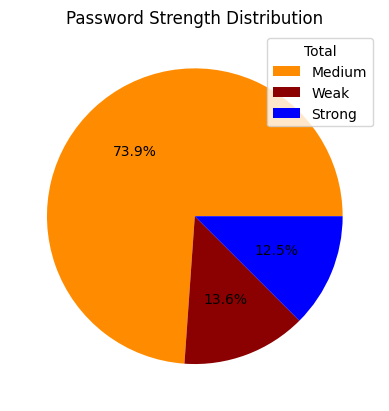

In [10]:
password_strength = df['strength'].value_counts()

plt.pie(password_strength, colors=['darkorange', 'darkred', 'blue'], autopct='%1.1f%%')
plt.title('Password Strength Distribution')
plt.legend(['Medium', 'Weak', 'Strong'], title='Total')
plt.show()

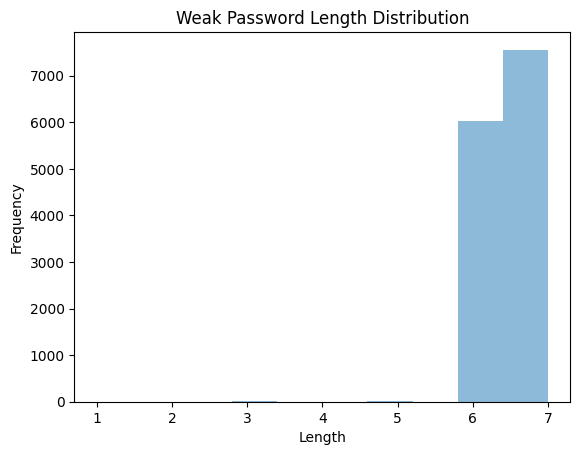

In [11]:
plt.hist(weak['password_length'], alpha=0.5, linewidth=2)
    
plt.title('Weak Password Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

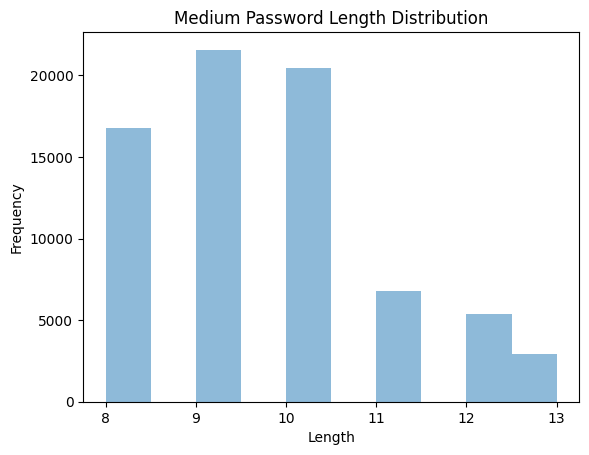

In [12]:
plt.hist(medium['password_length'], alpha=0.5, linewidth=2)
    
plt.title('Medium Password Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

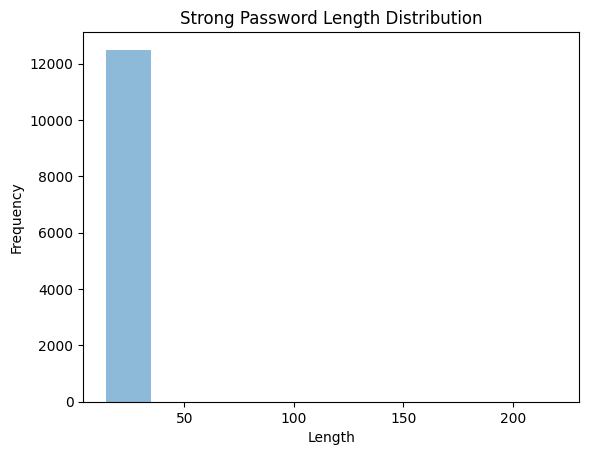

In [13]:
plt.hist(strong['password_length'], alpha=0.5, linewidth=2)
    
plt.title('Strong Password Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

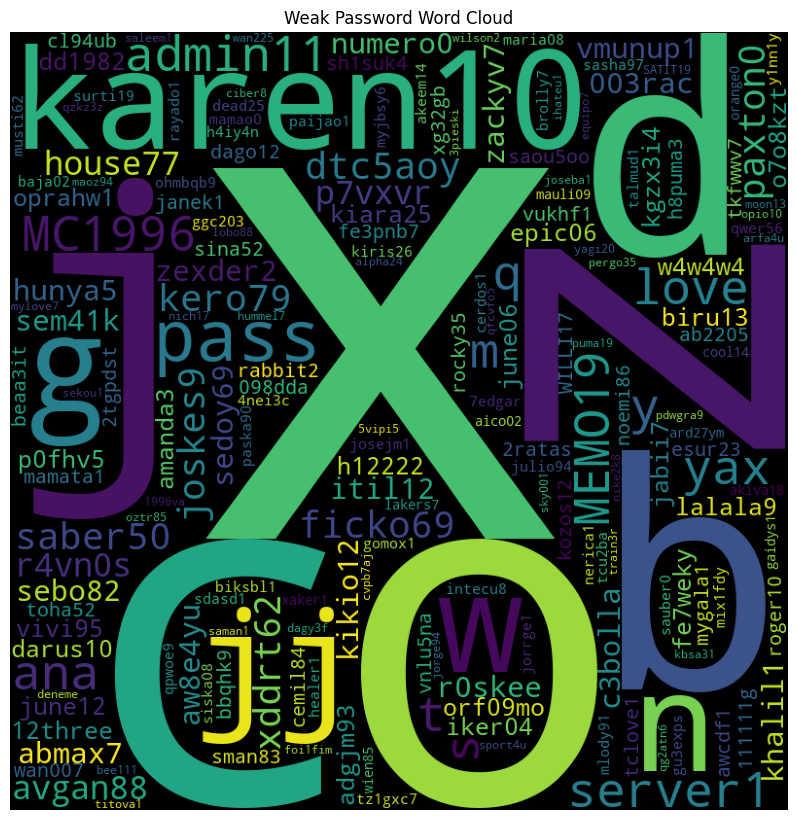

In [14]:
filtered_text = ' '.join(weak['password'])

wordcloud = WordCloud(
        width=800, 
        height=800, 
        min_font_size=10).generate(filtered_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f'Weak Password Word Cloud')
plt.tight_layout(pad=0)

plt.show()


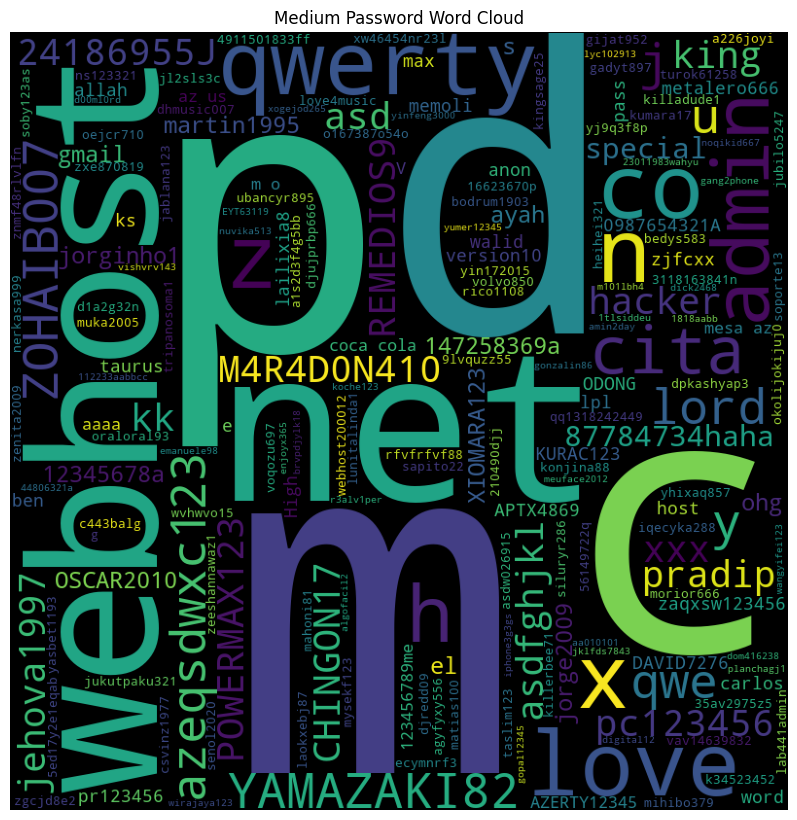

In [15]:
filtered_text = ' '.join(medium['password'])

wordcloud = WordCloud(
        width=800, 
        height=800, 
        min_font_size=10).generate(filtered_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f'Medium Password Word Cloud')
plt.tight_layout(pad=0)

plt.show()

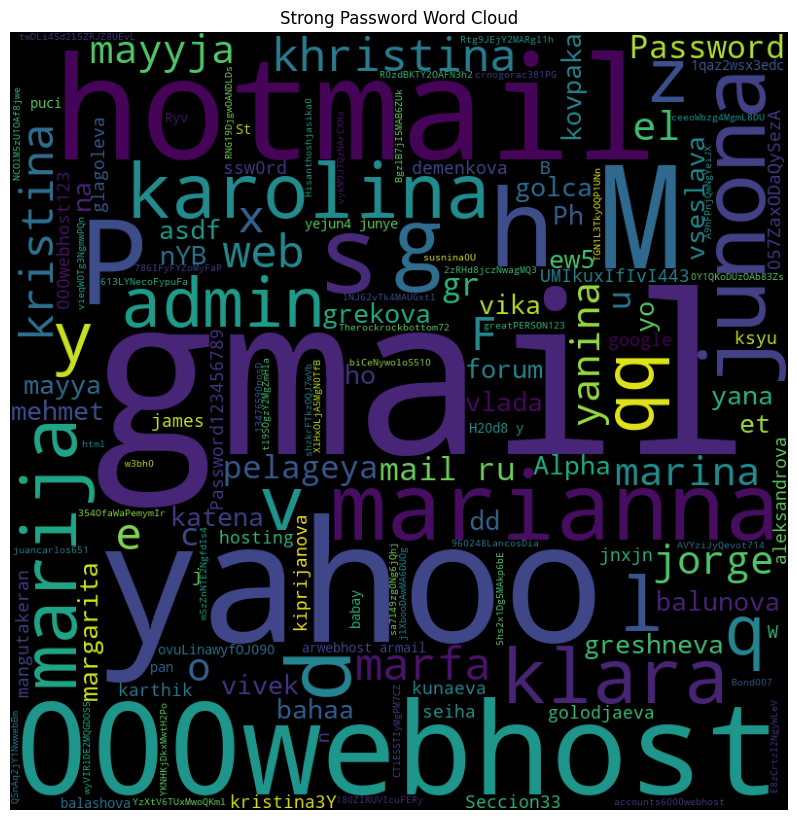

In [16]:
filtered_text = ' '.join(strong['password'])

wordcloud = WordCloud(
        width=800, 
        height=800, 
        min_font_size=10).generate(filtered_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f'Strong Password Word Cloud')
plt.tight_layout(pad=0)

plt.show()